In [10]:
import numpy as np
import pandas as pd
import math
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Read dataset from the CSV file.
train=pd.read_csv("datasets/train_dataset.csv")

In [13]:
print(train)

              ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0       12142509          6750        0.0         0.0          1.0        0.0   
1       12138936         20250        1.0         0.0          1.0        NaN   
2       12181264         18000        0.0         0.0          1.0        0.0   
3       12188929         15750        0.0         0.0          1.0        1.0   
4       12133385         33750        1.0         0.0          1.0        0.0   
...          ...           ...        ...         ...          ...        ...   
121851  12207714         29250        0.0         0.0          NaN        1.0   
121852  12173765         15750        0.0         1.0          1.0        0.0   
121853  12103937          8100        0.0         1.0          0.0        1.0   
121854  12170623         38250        1.0         1.0          0.0        1.0   
121855  12105610          9000        1.0         1.0          1.0        1.0   

        Child_Count Credit_

In [18]:
# Columns in the dataset (Columns are considered as the Features)
train.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [19]:
# Print data types for each variable
train.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [20]:
# Shape of the dataset
train.shape

(121856, 40)

In [27]:
# train.value_counts(normalize=True)
train['Client_Gender'].value_counts(normalize=True)

Male      0.656907
Female    0.343067
XNA       0.000025
Name: Client_Gender, dtype: float64

In [28]:
# Normalize can be set to True to print proportions instead of number 
train['Default'].value_counts()

0    112011
1      9845
Name: Default, dtype: int64

In [31]:
# Normalize can be set to True to print proportions instead of number 
# train['Default'].value_counts(normalize=True)
train['Default'].value_counts(normalize=True)
# type(train['Default'].value_counts(normalize=True))

0    0.919208
1    0.080792
Name: Default, dtype: float64

In [36]:
print(train['Default'].value_counts()[0])

112011


<AxesSubplot:>

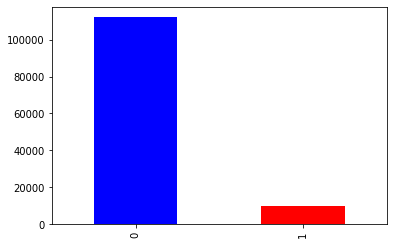

In [42]:
# Visualize the data in Default column
train['Default'].value_counts().plot.bar(x='default values', y='count', color=['blue','red'])